### 2.2.1迷宫的实现
迷宫是3x3的正方形，S0是起点，绿色圆圈表示，右下角S8是目标，红色代表墙无法通过

In [9]:
#导入所使用的包
import numpy as np
import pylab as plt
%matplotlib inline

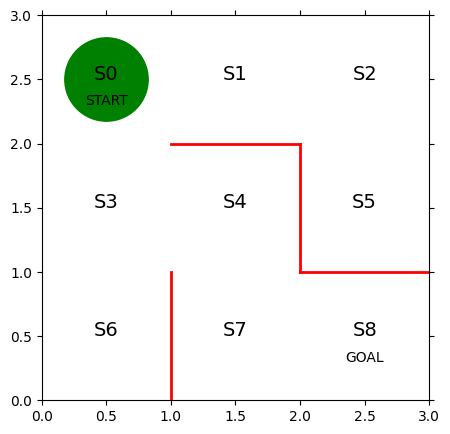

In [10]:
# 迷宫的初始位置

#声明图的大小以及图的变量名
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

#画出红色的墙壁
plt.plot([1,1],[0,1],color='red',linewidth=2)
plt.plot([1,2],[2,2],color='red',linewidth=2)
plt.plot([2,2],[2,1],color='red',linewidth=2)
plt.plot([2,3],[1,1],color='red',linewidth=2)

#画出表示状态的文字S0-S8
plt.text(0.5,2.5,'S0',size=14,ha='center')
plt.text(1.5,2.5,'S1',size=14,ha='center')
plt.text(2.5,2.5,'S2',size=14,ha='center')
plt.text(0.5,1.5,'S3',size=14,ha='center')
plt.text(1.5,1.5,'S4',size=14,ha='center')
plt.text(2.5,1.5,'S5',size=14,ha='center')
plt.text(0.5,0.5,'S6',size=14,ha='center')
plt.text(1.5,0.5,'S7',size=14,ha='center')

plt.text(2.5,0.5,'S8',size=14,ha='center')
plt.text(0.5,2.3,'START',ha='center')
plt.text(2.5,0.3,'GOAL',ha='center')

#设定画图的范围
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both',which='both',bottom='off',top='off',
                labelbottom='off',right='off',left='off',labelleft='off')

#当前位置S0用绿色圆圈画出
line, = ax.plot([0.5],[2.5],marker="o",color='g',markersize=60)

### 2.2.2智能体的实现
下面，绿色圆圈的智能体将随即移动。在强化学习中，智能体行为方式的规则称为策略（policy）。策略用希腊字母表示为$\pi_\theta(s,a)$表示，理解为“在状态$s$下采取动作$a$的概率遵循由参数$\theta$确定的策略$\pi$”。

状态$s$在本迷宫任务中表示智能体的位置，有S0-S8总共9个状态，在其他例子中，比如机器人运动控制中，状态指能再现当前状态的关节角度和移动速度；对于围棋来说，状态指棋子在棋盘下的位置和类型。

动作$a$指的是智能体执行的操作，在本任务中，有上下左右四个类型，但是不能向红墙的方向移动。在机器人运动控制中，动作指每个关节的马达旋转多少，对于围棋来说，动作指的是将棋子放在哪个位置。

策略$\pi_\theta(s,a)$可以通过很多种方式表达，有时可以使用函数来表达策略，如果是深度强化学习，就是用神经网络来表达策略；如果策略$\pi_\theta(s,a)$是函数，$\theta$则是函数的参数，对于神经网络就是神经元的连接参数。

In [11]:
#设定参数θ的初始值theta_0，用于确定初始方案
 
#行为状态0~7,列用↑、→、↓、←表示移动的方向
theta_0 = np.array([[np.nan,1,1,np.nan],     #S0
                    [np.nan,1,np.nan,1],     #S1
                    [np.nan,np.nan,1,1],     #S2
                    [1,1,1,np.nan],     #S3
                    [np.nan,np.nan,1,1],     #S4
                    [1,np.nan,np.nan,np.nan],#S5
                    [1,np.nan,np.nan,np.nan],#S6
                    [1,1,np.nan,np.nan],     #S7
                    ])     #S8是目标，无策略

然后对参数$\theta_0$进行转换，来求得策略，这里采用将$\theta_0$转换为百分比求概率simple_convert_into_pi_from_theta函数

In [12]:
def simple_convert_into_pi_from_theta(theta):

    [m,n] = theta.shape #获取θ矩阵的大小
    pi = np.zeros((m,n))
    for i in range(m):
        pi[i,:]=theta[i,:]/np.nansum(theta[i,:])
    pi = np.nan_to_num(pi) #将nan转为0
    return pi

In [13]:
# 求解初始策略
pi_0 = simple_convert_into_pi_from_theta(theta_0)
print(f'初始策略：\n{pi_0}')

初始策略：
[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [14]:
# 1步移动后求得状态s的函数的定义
def get_next_s(pi,s):
    direction = ['up','right','down','left']

    next_direction = np.random.choice(direction,p=pi[s,:])
    if next_direction == 'up':
        s_next = s - 3 #向上移动状态数字减3
    elif next_direction == 'right':
        s_next = s + 1 #向→移动状态数字+1
    elif next_direction == 'down':
        s_next = s + 3 #向下移动状态数字+3
    elif next_direction == 'left':
        s_next = s - 1 #向左移动状态数字-1
    return s_next

In [15]:
#迷宫内使智能体移动后到目标的函数的定义

def goal_maze(pi):
    s = 0#开始地点
    state_history = [0] #记录智能体移动的轨迹列表

    while(1):
        next_s = get_next_s(pi,s)
        state_history.append(next_s)

        if next_s == 8:
            break
        else:
            s = next_s

    return state_history

state_history = goal_maze(pi_0)
print(f'状态轨迹：{state_history}')
print(f'所需要的步数：{len(state_history)-1}')

状态轨迹：[0, 1, 2, 5, 2, 5, 2, 1, 2, 5, 2, 1, 0, 1, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 0, 1, 0, 3, 4, 7, 4, 7, 4, 3, 0, 3, 6, 3, 6, 3, 0, 3, 0, 1, 2, 5, 2, 5, 2, 5, 2, 1, 0, 1, 2, 1, 0, 1, 0, 3, 4, 7, 8]
所需要的步数：74


In [16]:
#智能体的移动可视化
from matplotlib import animation
from IPython.display import HTML

def init():
    '''初始化背景图像'''
    line.set_data([],[])
    return (line,)

def animate(i):
    '''每一帧画面内容'''
    state = state_history[i]  #画出当前位置
    x = (state % 3) + 0.5     #x的坐标
    y = 2.5 - int(state/3)
    line.set_data(x,y)
    return (line,)

#初始化函数和绘图函数生成动画
anim = animation.FuncAnimation(fig,animate,init_func=init,frames=len(state_history),
                               interval = 200,repeat=False)
HTML(anim.to_jshtml())

C:\Users\xulon\AppData\Local\Temp\ipykernel_35316\1369708611.py:15: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x,y)
